In this notebook the new data set for leaf area index (LAI) has been compared to the default LAI data set based on the MODIS sattelite informtion. Missing LAI from SPOT are filled with MODIS. 

In [27]:
# Loading packages
import xarray as xr 
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# Loading SPOT LAI and plotting for monthly mean values for January
ds_spot = xr.open_dataset('./data/geo_em.d01_SPOT.nc')
lai_spot = ds_spot['LAI12M'][:]
lai_spot[0,0,:,:].where(lai_spot[0,0,:,:] != 255.).plot(cmap='YlGn',vmin=0, vmax=2, aspect=1.3, size=3)
plt.title("SPOT LAI: January")
plt.show()

Note that nothen part of the domain is having missing values. This happens in Januray and December, and this is due to the position of the SPOT sattelite that was not coverine the far north during January and December.

In [29]:
# Loading MODIS LAI and plotting for monthly mean values for January
ds_modis = xr.open_dataset('./data/geo_em.d01_MODIS.nc')
lai_modis = ds_modis['LAI12M'][:]
lai_modis[0,0,:,:].where(lai_modis[0,0,:,:] != 255.).plot(cmap='YlGn',vmin=0, vmax=2, aspect=1.3, size=3)
plt.title("MODIS LAI: January")
plt.show()

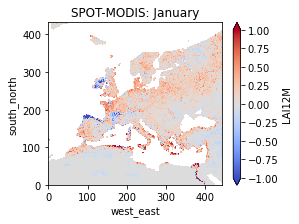

In [30]:
# Plotting an example difference between SPOT and MODIS LAI for January
diff=lai_spot[0,0,:,:].where(lai_spot[0,0,:,:] != 255.) - lai_modis[0,0,:,:].where(lai_modis[0,0,:,:] != 255.)
diff.plot(cmap='coolwarm', vmin=-1, vmax=1, aspect=1.3, size=3)
plt.title("SPOT-MODIS: January")
plt.show()

In [31]:
# Filling the gaps in SPOT LAI data with existing data in MODIS
ds_spot['LAI12M'].data[np.where(ds_spot['LAI12M'].data==255)] = ds_modis['LAI12M'].data[ds_spot['LAI12M'].data==255.]

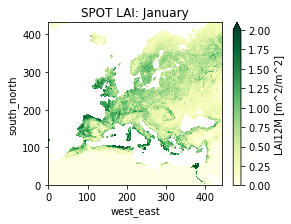

In [32]:
# Plotting the SPOT LAI with gaps filled with MODIS LAI for January
lai_spot = ds_spot['LAI12M'][:]
lai_spot[0,0,:,:].where(lai_spot[0,0,:,:] != 255.).plot(cmap='YlGn',vmin=0, vmax=2, aspect=1.3, size=3)
plt.title("SPOT LAI: January")
plt.show()

In [34]:
# Saving the filled file
#ds_spot.to_netcdf('./data/geo_em.d01.nc')

In [35]:
# Calculating the difference between SPOT and MODIS
ds_spot = xr.open_dataset('geo_em.d01.nc')
lai_spot = ds_spot['LAI12M'][:]
diff=lai_spot[0,:,:,:].where(lai_spot[0,:,:,:] != 255.)-lai_modis[0,0,:,:].where(lai_modis[0,0,:,:] != 255.)

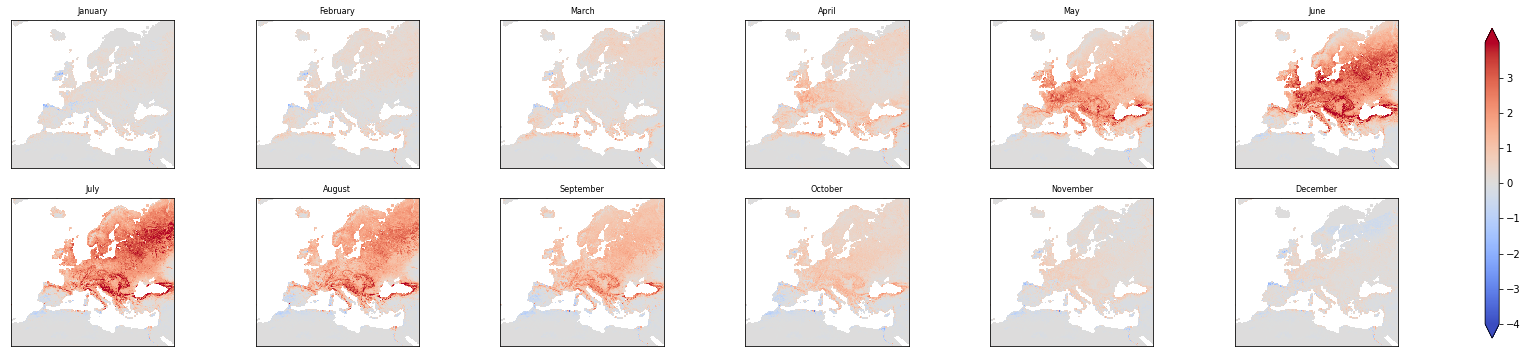

In [36]:
# Plotting the mean monthly differences between SPOT and MODIS
import calendar
fig, axes = plt.subplots(2,6,sharex=True,figsize=(32,6))
k=0
for i in range(2):
    for j in range(6):        
        plot=diff[k,:,:].plot(ax=axes[i,j], cmap='coolwarm', vmin=-4, vmax=4)
        axes[i,j].set_xticks([]),axes[i,j].set_yticks([])
        axes[i,j].set(xlabel=None), axes[i,j].set(ylabel=None)
        axes[i,j].set(title=calendar.month_name[k+1])
        axes[i,j].title.set_size(8)
        plot.colorbar.remove() 
        k=k+1

cbar = fig.colorbar(plot, ax=axes.ravel().tolist(), shrink=0.95,extend='both')
cbar.set_ticks(np.arange(-4, 4, 1))
plt.show()

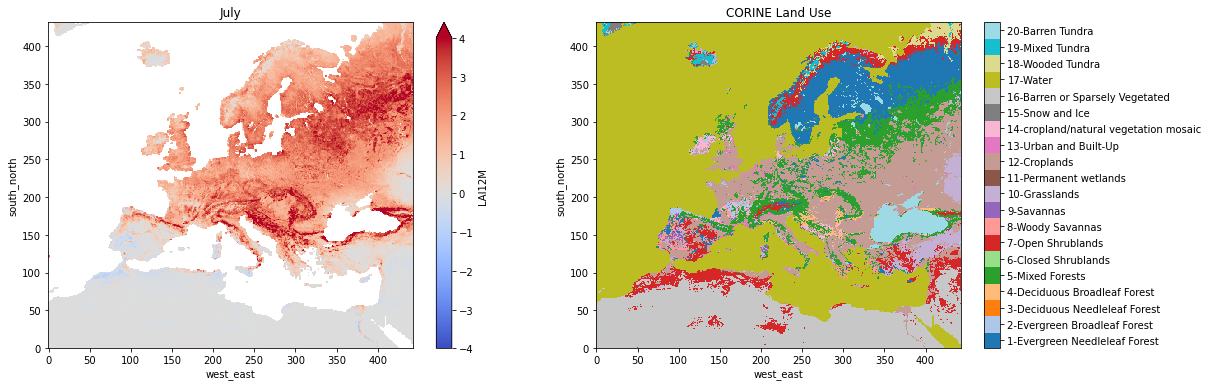

In [37]:
# Including LU INDEX map 
ds_spot = xr.open_dataset('geo_em.d01.nc')
lu_index = ds_spot['LU_INDEX'][:]
fig, axes = plt.subplots(ncols=2,sharex=True,figsize=(18,6))

plot=diff[6,:,:].plot(ax=axes[0], cmap='coolwarm', vmin=-4, vmax=4)
axes[0].set(title=calendar.month_name[7])
plot=lu_index[0,:,:].plot(ax=axes[1],cmap='tab20')
plot.colorbar.remove()                         
axes[1].set(title="CORINE Land Use")

# List of all land use categories categories 
LU_categories=['1-Evergreen Needleleaf Forest','2-Evergreen Broadleaf Forest','3-Deciduous Needleleaf Forest','4-Deciduous Broadleaf Forest',                        
'5-Mixed Forests','6-Closed Shrublands','7-Open Shrublands','8-Woody Savannas','9-Savannas','10-Grasslands','11-Permanent wetlands' ,                               
'12-Croplands', '13-Urban and Built-Up','14-cropland/natural vegetation mosaic','15-Snow and Ice','16-Barren or Sparsely Vegetated',                      
'17-Water','18-Wooded Tundra','19-Mixed Tundra','20-Barren Tundra' ]

# Adding the colorbar for the land use map
cbar=plt.colorbar(plot, ticks=np.linspace(1,20,20), boundaries=np.arange(0.5,21,1))
cbar.ax.set_yticklabels(LU_categories)
plt.show()